env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA


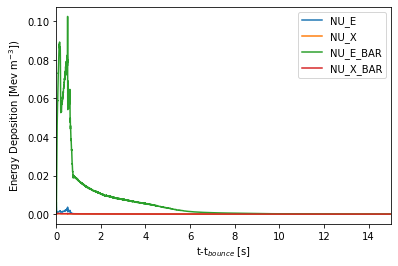

In [93]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA
from asteria.simulation import Simulation
from snewpy.neutrino import Flavor
import astropy.units as u
import numpy as np
import os

dt = 0.1*u.ms

model = {'name': 'Sukhbold_2015',
        'param':{'progenitor_mass': 27*u.Msun, 'eos': 'LS220'}}

sim = Simulation(model=model,
                 distance=10* u.kpc, 
                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                 tmin=0*u.s, tmax=15*u.s, dt=dt,
                 geomscope = 'Gen2')
sim.run()

import matplotlib.pyplot as plt
for flavor in sim.flavors:
    plt.plot(sim.time, sim.E_per_V[flavor], label=flavor.name)
plt.legend()
ax = plt.gca()
ax.set(xlabel=r't-t$_{bounce}$ [s]', ylabel='Energy Deposition [Mev m$^{-3}$])', xlim=(0, 15));

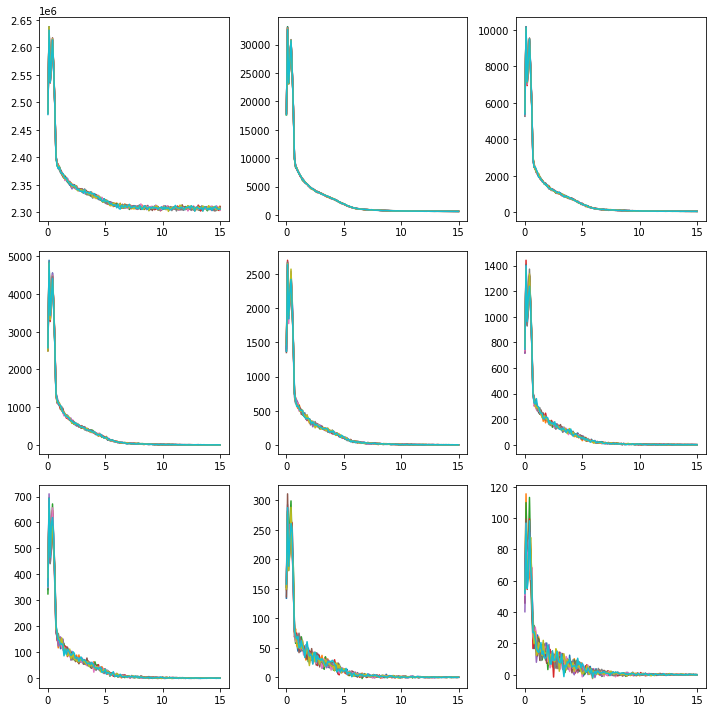

In [2]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
ax = ax.ravel()
m_range = np.arange(1,10, dtype = int)

for j,m in enumerate(m_range):
    t, sig = sim.detector_hits(subdetector='md', dt = 100*u.ms, size=10, new_multi=m)
    bkg = sim.detector.md_bg(dt = 100*u.ms, size = 10 * sig.shape[1], new_multi=m).reshape(10, sig.shape[1])
    ax[j].plot(t, (sig+bkg).T)
    
plt.tight_layout()

In [11]:
m_range = np.arange(1,10)
d_range = np.arange(10,310,10)*u.kpc

Z = []

for m in m_range:
    print('Multiplicity: {:}'.format(m))
    for d in d_range:
        print('Distance: {:}'.format(d))
        signis = sim.sample_significance(dt = 500*u.ms, distance=d, sample_size=100, binnings, new_multi=m)    
        z_50 = np.quantile(signis, 0.5)
        z_14 = np.quantile(signis, 0.14)
        z_86 = np.quantile(signis, 0.86)
        Z.append([z_50, z_14, z_86])
  
zdat = np.array(Z).reshape((len(m_range), len(d_range), 3))

Multiplicity: 1
Distance: 10.0 kpc
Distance: 20.0 kpc
Distance: 30.0 kpc
Distance: 40.0 kpc
Distance: 50.0 kpc
Distance: 60.0 kpc
Distance: 70.0 kpc
Distance: 80.0 kpc
Distance: 90.0 kpc
Distance: 100.0 kpc
Distance: 110.0 kpc
Distance: 120.0 kpc
Distance: 130.0 kpc
Distance: 140.0 kpc
Distance: 150.0 kpc
Distance: 160.0 kpc
Distance: 170.0 kpc
Distance: 180.0 kpc
Distance: 190.0 kpc
Distance: 200.0 kpc
Distance: 210.0 kpc
Distance: 220.0 kpc
Distance: 230.0 kpc
Distance: 240.0 kpc
Distance: 250.0 kpc
Distance: 260.0 kpc
Distance: 270.0 kpc
Distance: 280.0 kpc
Distance: 290.0 kpc
Distance: 300.0 kpc
Multiplicity: 2
Distance: 10.0 kpc
Distance: 20.0 kpc
Distance: 30.0 kpc
Distance: 40.0 kpc
Distance: 50.0 kpc
Distance: 60.0 kpc
Distance: 70.0 kpc
Distance: 80.0 kpc
Distance: 90.0 kpc
Distance: 100.0 kpc
Distance: 110.0 kpc
Distance: 120.0 kpc
Distance: 130.0 kpc
Distance: 140.0 kpc
Distance: 150.0 kpc
Distance: 160.0 kpc
Distance: 170.0 kpc
Distance: 180.0 kpc
Distance: 190.0 kpc
Distan

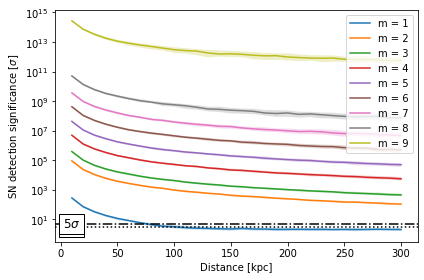

In [12]:
fig, ax = plt.subplots(1,1, figsize = (6,4))

for j, m in enumerate(m_range):
    ax.plot(d_range, zdat[j,:,0], label = 'm = {:}'.format(m))
    ax.fill_between(d_range.value, zdat[j,:,1], zdat[j,:,2], alpha = 0.25)
ax.axhline(3, color='k', ls = ':')
ax.axhline(5, color='k', ls = '-.')
ax.text(10, 3, r"3$\sigma$", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="square", ec='k', fc='white'))
ax.text(10, 5, r"5$\sigma$", size=12,
         ha="center", va="center",
         bbox=dict(boxstyle="square", ec='k', fc='white'))

ax.set_yscale('log')
ax.set_xlabel('Distance [kpc]')
ax.set_ylabel('SN detection significance $[\sigma]$')
ax.legend()
plt.tight_layout()

Ok, we have a problem. Why are the lines falling not steeper? Let's check if the mDOM is doing what it's suppose to do. We start with all mDOM and move to IceCube Gen2. One mDOM has about 2300 Hz noise (m=1), all together about to 22 MHz. In 0.1 ms binning that is 2.2 kHz of noise. This is exactly what we see in the upper plot for the noise.

In [94]:
t, sig_1 = sim.detector_signal(dt=dt, subdetector='md', new_multi=1)
bkg_1 = sim.detector.md_bg(dt=dt, new_multi=1, size = len(sig_1))

t, sig_7 = sim.detector_signal(dt=dt, subdetector='md', new_multi=7)
bkg_7 = sim.detector.md_bg(dt=dt, new_multi=7, size = len(sig_7))

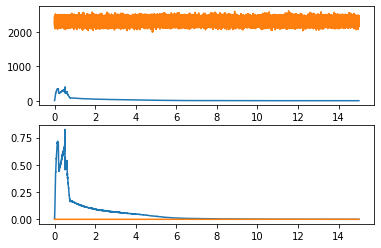

In [95]:
fig, ax = plt.subplots(2,1)

ax[0].plot(t, sig_1.flatten())
ax[0].plot(t, bkg_1)

ax[1].plot(t, sig_7.flatten())
ax[1].plot(t, bkg_7)

In [96]:
sig_1.max()

402.10870548443364

In [97]:
t, sig_1 = sim.detector_signal(dt=dt, new_multi=1)
bkg_md_1 = sim.detector.dc_bg(dt=dt, size = len(sig_1)) + sim.detector.i3_bg(dt=dt, size = len(sig_1))

t, sig_7 = sim.detector_signal(dt=dt, new_multi=7)
bkg_7 = sim.detector.dc_bg(dt=dt, size = len(sig_1)) + sim.detector.i3_bg(dt=dt, size = len(sig_1))

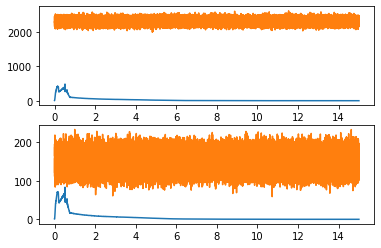

In [98]:
fig, ax = plt.subplots(2,1)

ax[0].plot(t, sig_1.flatten())
ax[0].plot(t, bkg_1)

ax[1].plot(t, sig_7.flatten())
ax[1].plot(t, bkg_7)

In [99]:
sig_1.max()

484.2705384961322

In [100]:
sim.detector_signal(dt=dt, new_multi=1)

(<Quantity [0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 1.49998e+01,
            1.49999e+01, 1.50000e+01] s>,
 array([6.04905048, 6.05992989, 6.06499666, ..., 0.05559456, 0.0555907 ,
        0.05558684]))

So here we are. I would say that the multiplicities are applied correctly. One possible explaination would be that there is a mistake in the SNDAQ function. To test that first understand what is going on so that we can write test fumctions.